In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

eartquake = pd.read_csv(
    'data/earthquakes.csv'
)

In [51]:
fb

dtype('<M8[ns]')

## 1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method. (5 pts)

<Axes: title={'center': 'Rolling with 20 days minimum'}, xlabel='date'>

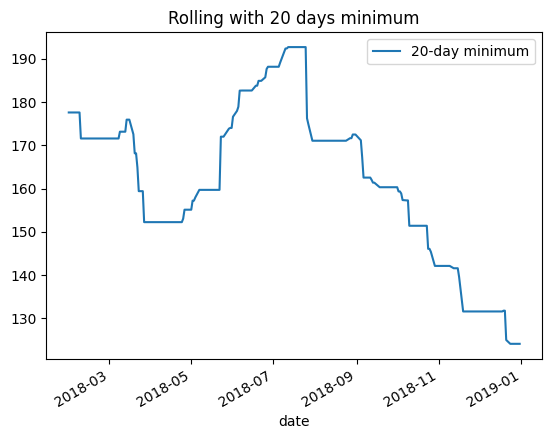

In [21]:
fb['20-day minimum'] = fb['close'].rolling(20).min()
fb.plot(
    kind='line',
    y='20-day minimum',
    title='Rolling with 20 days minimum'
)

## 2. Create a histogram and KDE of the change from open to close in the Facebook stock price. (5 pts)

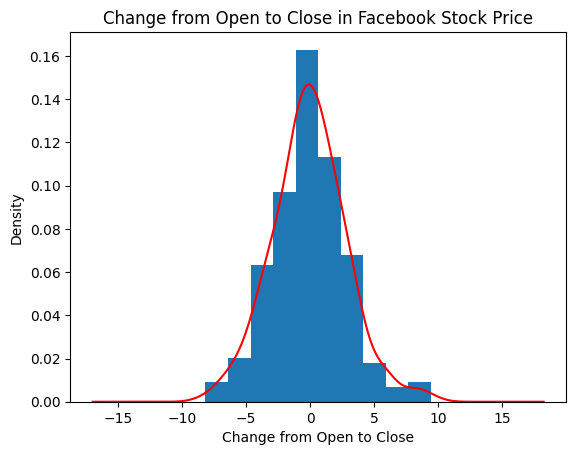

In [28]:
fb['Change from open to close'] = fb['open'] - fb['close']

ax = fb['Change from open to close'].plot(kind='hist', label='Histogram', density=True)
fb['Change from open to close'].plot(kind='kde', ax=ax, label='KDE', color='red')

plt.title('Change from Open to Close in Facebook Stock Price')
plt.xlabel('Change from Open to Close')
plt.show()

## 3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia. (5 pts)

In [40]:
eartquake['parsed_place'].unique()

array(['California', 'Dominican Republic', 'Alaska', 'Indonesia',
       'Canada', 'Puerto Rico', 'Montana', 'Nevada', 'Christmas Island',
       'Hawaii', 'Northern Mariana Islands', 'Japan', 'Ecuador',
       'Vanuatu', 'Mexico', 'Russia', 'British Virgin Islands',
       'Washington', 'Papua New Guinea', 'Fiji', 'U.S. Virgin Islands',
       'Chile', 'Peru', 'Yemen', 'Guatemala', 'Kansas', 'Australia',
       'Wyoming', 'Kuril Islands', 'Oklahoma', 'Tennessee',
       'Pacific-Antarctic Ridge', 'Utah', 'Colombia', 'Argentina',
       'Oregon', 'Greece', 'Missouri', 'Tajikistan',
       'Northern Mid-Atlantic Ridge', 'Sumatra', 'Solomon Islands',
       'Burma', 'Taiwan', 'Nicaragua',
       'South Georgia and South Sandwich Islands', 'Idaho', 'Kyrgyzstan',
       'Arizona', 'Tonga', 'Northern East Pacific Rise', 'South Africa',
       'Southern Mid-Atlantic Ridge', 'Costa Rica', 'China',
       'Philippines', 'Haiti', 'Jamaica', 'Kentucky', 'New Zealand',
       'Iran', 'Afghanistan

In [41]:
eartquake['magType'].unique()

array(['ml', 'md', 'mb', 'mww', 'mb_lg', 'mwr', 'mw', 'mh', 'ms_20',
       'mwb', nan], dtype=object)

Text(0, 0.5, 'magnitude')

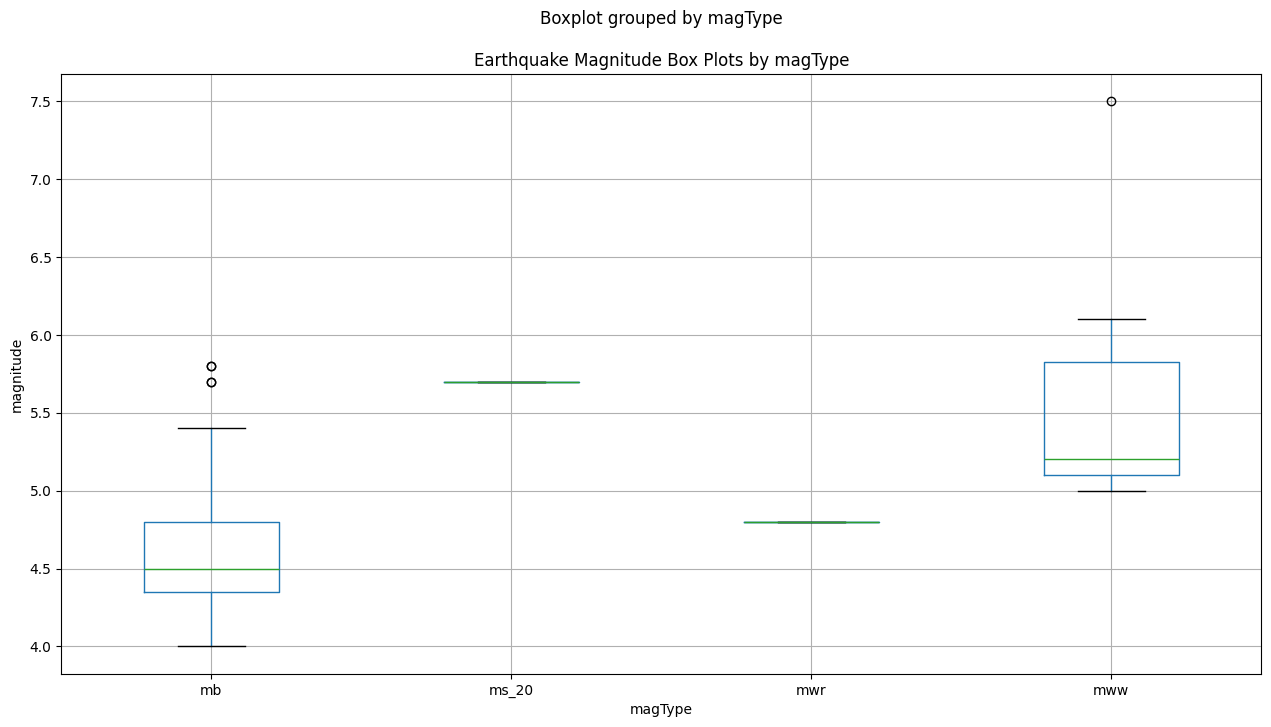

In [39]:
indonesia_earthquake = eartquake[eartquake['parsed_place'].str.contains('Indonesia')]
indonesia_earthquake.boxplot(
    figsize=(15, 8),
    column='mag',
    by='magType'
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')

## 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line. (5 pts)

In [42]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


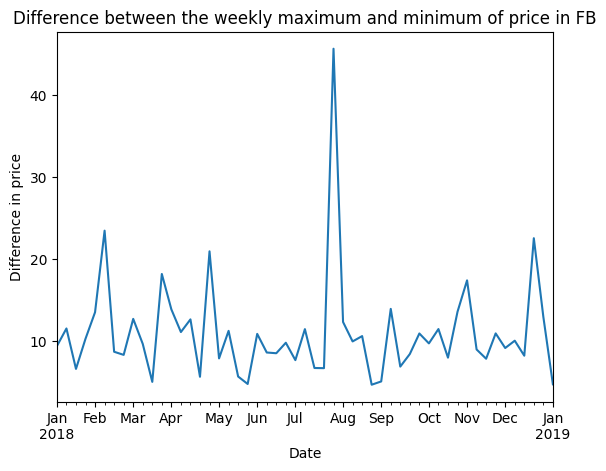

In [45]:
weekly_high = fb['high'].resample('W').max()
weekly_low = fb['low'].resample('W').min()

weekly_difference = weekly_high - weekly_low

weekly_difference.plot(
    title='Difference between the weekly maximum and minimum of price in FB',
    kind='line'
)
plt.xlabel('Date')
plt.ylabel('Difference in price')
plt.show()

## 5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price: (10 pts)

1. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price.
2. The second subplot will be a bar plot showing the net effect this had monthly, using resample().
3. Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
4. Bonus #2: Modify the x-axis of the bar plot to show the three letter abbreviation for the month.

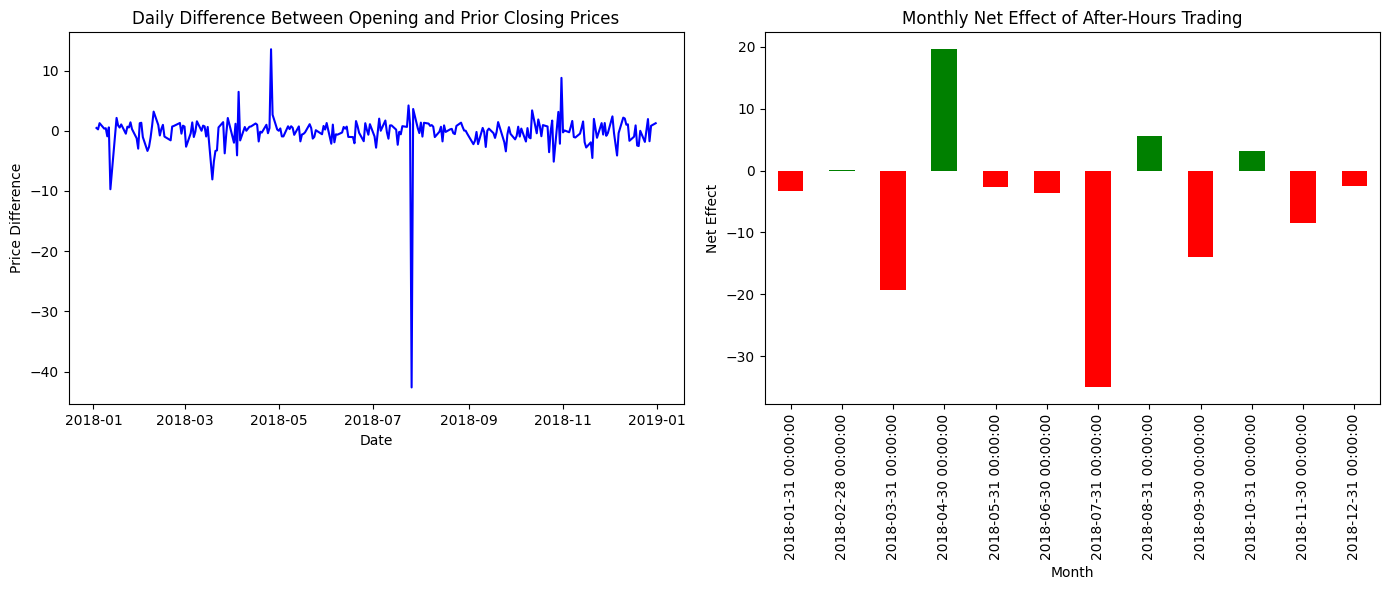

In [56]:
fb['Prev Close Price'] = fb['close'].shift(1)  
fb['Daily Diff'] = fb['open'] - fb['Prev Close Price']

monthly_diff = fb['Daily Diff'].resample('M').sum()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(fb.index, fb['Daily Diff'], label='Daily Difference', color='blue')
ax[0].set_title('Daily Difference Between Opening and Prior Closing Prices')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price Difference')

colors = []
for i in monthly_diff:
    if i > 0:
        colors.append('green')
    else:
        colors.append('red')
        
monthly_diff.plot(kind='bar', ax=ax[1], color=colors)
ax[1].set_title('Monthly Net Effect of After-Hours Trading')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Net Effect')

plt.tight_layout()
plt.show()